In [29]:
import pandas as pd
import numpy as np
from pathlib import Path
# import hvplot.pandas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import datetime as dt

%matplotlib inline

In [30]:
filepath = Path("../data/MSFT_EWMA_MACD_signals.csv")

In [31]:
msft_ewma_macd_df = pd.read_csv(filepath)
msft_ewma_macd_df["timestamp"] = pd.to_datetime(msft_ewma_macd_df["timestamp"]).dt.date
msft_ewma_macd_df = msft_ewma_macd_df.set_index("timestamp")
msft_ewma_macd_df.head()

,Short_EWMA,Long_EWMA,Final_Signal,macd,signal_lag,divergence
timestamp,,,,,,
2017-06-01,70.100000,70.100000,0.0,0.000000,0.000000,0.000000
2017-06-02,70.999167,70.961923,0.0,0.037244,0.020691,0.016553
2017-06-05,71.499076,71.435495,0.0,0.063581,0.038269,0.025312
2017-06-06,71.821342,71.738675,0.0,0.082667,0.053309,0.029358
2017-06-07,71.975844,71.889720,0.0,0.086124,0.063070,0.023054


In [32]:
msft_ewma_macd_df.shape

(1260, 6)

In [33]:
X = msft_ewma_macd_df[["Short_EWMA", "Long_EWMA", "macd", "signal_lag"]]
X = X.drop(X.index[1259])
# display(X.head())
# display(X.tail())
X

,Short_EWMA,Long_EWMA,macd,signal_lag
timestamp,,,,
2017-06-01,70.100000,70.100000,0.000000,0.000000
2017-06-02,70.999167,70.961923,0.037244,0.020691
2017-06-05,71.499076,71.435495,0.063581,0.038269
2017-06-06,71.821342,71.738675,0.082667,0.053309
2017-06-07,71.975844,71.889720,0.086124,0.063070
...,...,...,...,...
2022-05-24,261.857360,269.924942,-8.067582,-7.886178
2022-05-25,261.959304,269.376428,-7.417124,-7.792367
2022-05-26,262.565565,269.118915,-6.553349,-7.544564


In [34]:
y = msft_ewma_macd_df["Final_Signal"]
y = y.shift(1).dropna()
y

timestamp
2017-06-02    0.0
2017-06-05    0.0
2017-06-06    0.0
2017-06-07    0.0
2017-06-08    0.0
             ... 
2022-05-25    0.0
2022-05-26    0.0
2022-05-27    0.0
2022-05-31    0.0
2022-06-01    0.0
Name: Final_Signal, Length: 1259, dtype: float64

In [35]:
# from pandas.tseries.offsets import DateOffset

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [37]:
# training_end = X.index.min() + DateOffset(months= 42) 

# print(training_end)

In [38]:
# X_train = X.loc[training_begin:training_end]
# y_train = y.loc[training_begin:training_end]

In [39]:
# X_test = X.loc[training_end:]
# y_test = y.loc[training_end:]



In [40]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler model to the X training data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test Data using the Scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [57]:

ann = tf.keras.models.Sequential()

number_units= 100

# Layer 1
ann.add(tf.keras.layers.Dense(units=number_units, activation="sigmoid"))

# Layer 2
ann.add(tf.keras.layers.Dense(units=50, activation="sigmoid"))

# Layer 3
ann.add(tf.keras.layers.Dense(units=40, activation="tanh"))

# Output layer
ann.add(tf.keras.layers.Dense(units=1, activation = "sigmoid"))   

In [58]:
ann.compile(optimizer="adam", loss="mean_squared_error", metrics=['accuracy'])

In [43]:
# ann.summary()

In [59]:
ann.fit(X_train_scaled, y_train, epochs=500, batch_size=32)

Epoch 1/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2513 - accuracy: 0.5253
Epoch 2/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2381 - accuracy: 0.5770
Epoch 3/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2313 - accuracy: 0.5789
Epoch 4/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.6395
Epoch 5/500
32/32 [==============================] - 0s 2ms/step - loss: 0.2128 - accuracy: 0.6544
Epoch 6/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2077 - accuracy: 0.6524
Epoch 7/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2067 - accuracy: 0.6435
Epoch 8/500
32/32 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.6822
Epoch 9/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1968 - accuracy: 0.6743
Epoch 10/500
32/32 [==============================] - 0s 1ms/step - loss: 0.1960 - accuracy: 0.6852
Epoch 11/

In [60]:
model_loss, model_accuracy = ann.evaluate(X_test_scaled, y_test, verbose=2)

8/8 - 0s - loss: 0.0169 - accuracy: 0.9802 - 93ms/epoch - 12ms/step


In [61]:
prediction = (ann.predict(X_test_scaled)> 0.5).astype("int32")

In [62]:
results = pd.DataFrame({"predictions": prediction.ravel(), "actual": y_test})
results.head(10)

,predictions,actual
timestamp,,
2021-04-14,1,1.0
2020-04-13,1,1.0
2021-04-23,1,1.0
2019-08-09,0,0.0
2019-06-17,1,1.0
2017-11-20,0,0.0
2022-03-17,0,0.0
2017-11-02,1,1.0
2020-01-07,0,1.0


In [63]:
from sklearn import svm
from sklearn.metrics import classification_report

In [64]:
report = classification_report(y_test, prediction)


# Display the report
print(report)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       143
         1.0       0.98      0.97      0.98       109

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252



In [76]:
tsla_df = pd.read_csv("TSLA_EWMA_MACD_signals.csv")
tsla_df["timestamp"] = pd.to_datetime(tsla_df["timestamp"]).dt.date
tsla_df = tsla_df.set_index("timestamp")
tsla_df.head()
tsla_df = tsla_df.iloc[1100:]
tsla_df_X = tsla_df[["Short_EWMA", "Long_EWMA", "macd", "signal_lag"]]
tsla_y = tsla_df[["Final_Signal"]]


<AxesSubplot:ylabel='Frequency'>

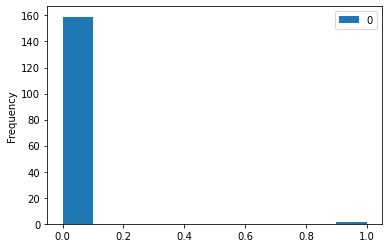

In [77]:
tsla_prediction = (ann.predict(tsla_df_X)> 0.5).astype("int32")
tsla_plot = pd.DataFrame(tsla_prediction)
tsla_plot.plot.hist()


In [78]:
report = classification_report(tsla_y, tsla_prediction)


# Display the report
print(report)

              precision    recall  f1-score   support

         0.0       0.74      1.00      0.85       117
         1.0       1.00      0.02      0.05        43

    accuracy                           0.74       160
   macro avg       0.87      0.51      0.45       160
weighted avg       0.81      0.74      0.63       160

